# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint

url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"

call_url = f"{url}appid={weather_api_key}&units={unit}&q="

temp = []
hum = []
cloud = []
wind = []
country = []
lat = []
lon = []

for city in cities:
    try:
        response = requests.get(call_url + city)
        data = response.json()
        country.append(data['sys']['country'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        temp.append(data['main']['temp_max'])
        hum.append(data['main']['humidity'])
        cloud.append(data['clouds']['all'])
        wind.append(data['wind']['speed'])
        print(f"{city} found and stored!")
    except:
        print(f"{city} not found...skipping")
        country.append("NA")
        lat.append("NA")
        lon.append("NA")
        temp.append("NA")
        hum.append("NA")
        cloud.append("NA")
        wind.append("NA")
        continue



avarua found and stored!
port alfred found and stored!
salalah found and stored!
fez found and stored!
talnakh found and stored!
alta floresta found and stored!
rikitea found and stored!
constitucion found and stored!
laguna found and stored!
cabedelo found and stored!
vila franca do campo found and stored!
puerto ayora found and stored!
port macquarie found and stored!
honningsvag found and stored!
yellowknife found and stored!
thinadhoo found and stored!
carnarvon found and stored!
burica not found...skipping
illoqqortoormiut not found...skipping
buhovo found and stored!
dikson found and stored!
port elizabeth found and stored!
velikooktyabrskiy found and stored!
sitka found and stored!
bluff found and stored!
touros found and stored!
kasama found and stored!
mayo found and stored!
zhangye found and stored!
albany found and stored!
beira found and stored!
vaini found and stored!
inirida found and stored!
pundri found and stored!
nikolskoye found and stored!
hithadhoo found and stored

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_dict = {
    "City": cities,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind
}

cities_df = pd.DataFrame(cities_dict)

cities_df.to_csv("Output File/output.csv", index=False)

cities_df


,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,avarua,CK,-21.21,-159.78,75.2,57,95,6.93
1,port alfred,ZA,-33.59,26.89,53.04,43,47,5.7
2,salalah,OM,17.02,54.09,80.6,94,75,3.36
3,fez,MA,34.04,-5,82.4,45,0,10.29
4,talnakh,RU,69.49,88.4,48.2,93,75,8.95
...,...,...,...,...,...,...,...,...
640,riberalta,BO,-10.98,-66.1,79.97,63,81,1.92
641,badvel,IN,14.75,79.05,76.48,85,100,8.28
642,maghama,NA,NA,NA,NA,NA,NA,NA
643,sladkovo,RU,55.53,70.34,66.94,75,0,3.89


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Extract relevant fields from the data frame

clean_df = cities_df[~cities_df['Latitude'].isin(['NA'])]
clean_df['Humidity'].astype(float)

final_df = clean_df[~(clean_df['Humidity'] > 100)]
final_df

# Export the City_Data into a csv
final_df.to_csv("Output file/cleanoutput.csv", index=False)
#clean_df
final_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,avarua,CK,-21.21,-159.78,75.2,57,95,6.93
1,port alfred,ZA,-33.59,26.89,53.04,43,47,5.7
2,salalah,OM,17.02,54.09,80.6,94,75,3.36
3,fez,MA,34.04,-5,82.4,45,0,10.29
4,talnakh,RU,69.49,88.4,48.2,93,75,8.95
...,...,...,...,...,...,...,...,...
639,waingapu,ID,-9.66,120.26,78.19,69,62,14
640,riberalta,BO,-10.98,-66.1,79.97,63,81,1.92
641,badvel,IN,14.75,79.05,76.48,85,100,8.28
643,sladkovo,RU,55.53,70.34,66.94,75,0,3.89


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

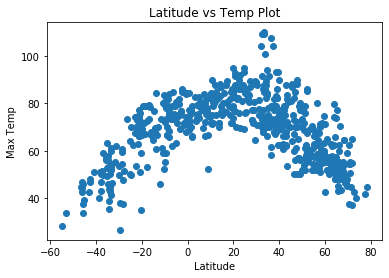

In [6]:
plt.scatter(final_df['Latitude'], final_df['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Temp Plot')
plt.savefig('Output File/Latitude vs Temp.png')
plt.show()

## Latitude vs. Humidity Plot

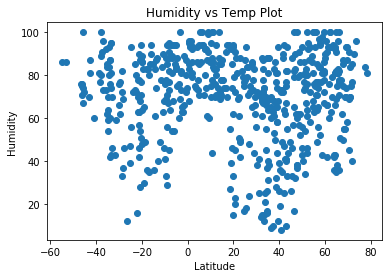

In [7]:
plt.scatter(final_df['Latitude'], final_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs Temp Plot')
plt.savefig('Output File/Latitude vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

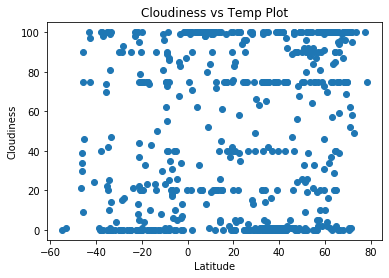

In [8]:
plt.scatter(final_df['Latitude'], final_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Temp Plot')
plt.savefig('Output File/Latitude vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

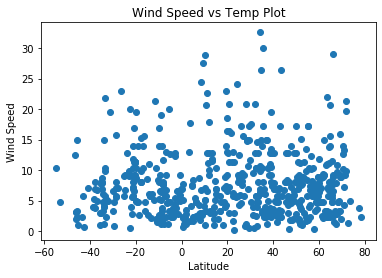

In [9]:
plt.scatter(final_df['Latitude'], final_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Temp Plot')
plt.savefig('Output File/Latitude vs Wind Speed.png')
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
import scipy.stats as st
# Create Northern and Southern Hemisphere DataFrames
north_df = final_df[~(clean_df['Latitude'] <= 0)]
south_df = final_df[~(clean_df['Latitude'] >= 0)]

north_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
2,salalah,OM,17.02,54.09,80.6,94,75,3.36
3,fez,MA,34.04,-5,82.4,45,0,10.29
4,talnakh,RU,69.49,88.4,48.2,93,75,8.95
8,laguna,US,38.42,-121.42,93.2,28,1,9.17
10,vila franca do campo,PT,37.72,-25.43,68,68,75,10.29
...,...,...,...,...,...,...,...,...
634,bandarbeyla,SO,9.49,50.81,82.36,60,1,27.58
636,tabas,IR,33.6,56.92,86,25,14,4.7
638,tabou,CI,4.42,-7.35,74.34,78,100,7.36
641,badvel,IN,14.75,79.05,76.48,85,100,8.28


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 Max Temp and Latitude correlation is -0.65


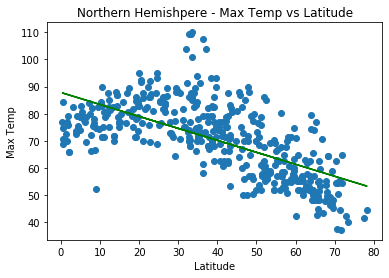

In [12]:

cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Max Temp'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Max Temp'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Max Temp and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Max Temp'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemishpere - Max Temp vs Latitude')
plt.savefig('Output File/NH-Latitude vs Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 Max Temp and Latitude correlation is 0.8


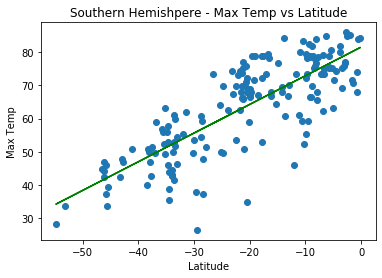

In [13]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Max Temp'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Max Temp'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Max Temp and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Max Temp'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemishpere - Max Temp vs Latitude')
plt.savefig('Output File/SH-Latitude vs Max Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Humidity and Latitude correlation is -0.04


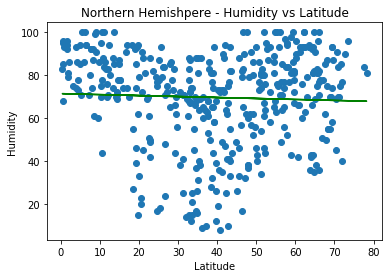

In [14]:
cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Humidity'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Humidity'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Humidity and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Humidity'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemishpere - Humidity vs Latitude')
plt.savefig('Output File/NH-Latitude vs Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 Humidity and Latitude correlation is 0.01


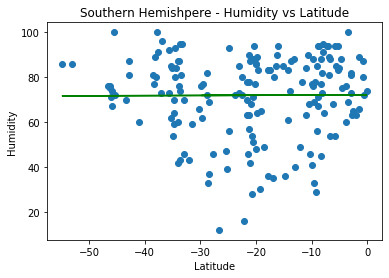

In [15]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Humidity'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Humidity'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Humidity and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Humidity'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemishpere - Humidity vs Latitude')
plt.savefig('Output File/SH-Latitude vs Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Cloudiness and Latitude correlation is 0.02


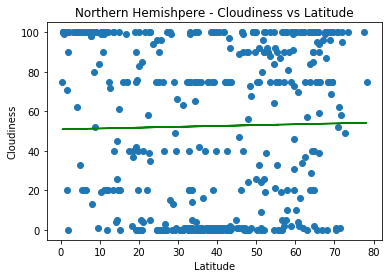

In [16]:
cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Cloudiness'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Cloudiness'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Cloudiness and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Cloudiness'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemishpere - Cloudiness vs Latitude')
plt.savefig('Output File/NH-Latitude vs Cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 Cloudiness and Latitude correlation is 0.05


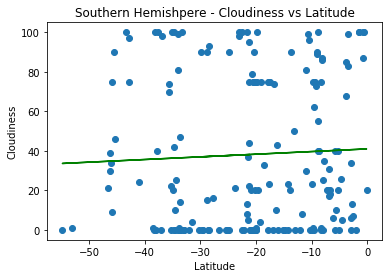

In [17]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Cloudiness'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Cloudiness'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Cloudiness and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Cloudiness'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemishpere - Cloudiness vs Latitude')
plt.savefig('Output File/SH-Latitude vs Cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Wind Speed and Latitude correlation is 0.0


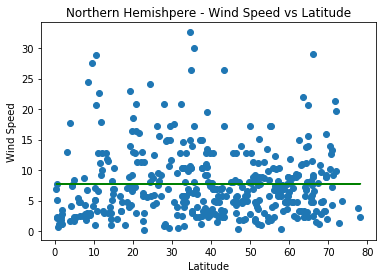

In [18]:
cor1 = round(st.pearsonr(north_df['Latitude'], north_df['Wind Speed'])[0],2)
lin_reg = st.linregress(north_df['Latitude'].astype(float), north_df['Wind Speed'].astype(float))

y_val =north_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Wind Speed and Latitude correlation is {cor1}")
plt.scatter(north_df['Latitude'], north_df['Wind Speed'])
plt.plot(north_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemishpere - Wind Speed vs Latitude')
plt.savefig('Output File/NH-Latitude vs Wind Speed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 Wind Speed and Latitude correlation is 0.06


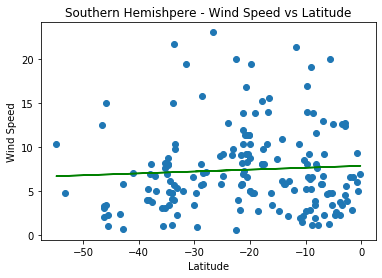

In [19]:
cor1 = round(st.pearsonr(south_df['Latitude'], south_df['Wind Speed'])[0],2)
lin_reg = st.linregress(south_df['Latitude'].astype(float), south_df['Wind Speed'].astype(float))

y_val =south_df['Latitude'] * lin_reg[0] + lin_reg[1]

print(f" Wind Speed and Latitude correlation is {cor1}")
plt.scatter(south_df['Latitude'], south_df['Wind Speed'])
plt.plot(south_df['Latitude'], y_val, color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemishpere - Wind Speed vs Latitude')
plt.savefig('Output File/SH-Latitude vs Wind Speed.png')
plt.show()